# Exploration of Titanic dataset

In [3]:
import numpy as np
import pandas as pd
pd.set_option("display.width", 1500)
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Overview of the files

In [4]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv", index_col="PassengerId")
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv", index_col="PassengerId")
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
def explore_missing(df):
    row_count = df.shape[0]
    for c in df.columns:
        m_count = df[c].isnull().sum()
        if m_count > 0:
            print(f'{c} - {m_count} ({round(m_count/row_count*100, 3)}%) rows missing')

In [7]:
explore_missing(train_data)

Age - 177 (19.865%) rows missing
Cabin - 687 (77.104%) rows missing
Embarked - 2 (0.224%) rows missing


In [8]:
explore_missing(test_data)

Age - 86 (20.574%) rows missing
Fare - 1 (0.239%) rows missing
Cabin - 327 (78.23%) rows missing


# Survived

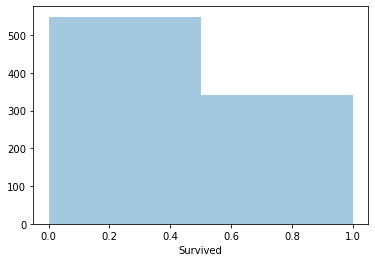

In [10]:
sns.distplot(train_data.Survived, kde=False, bins=2)

# Fare

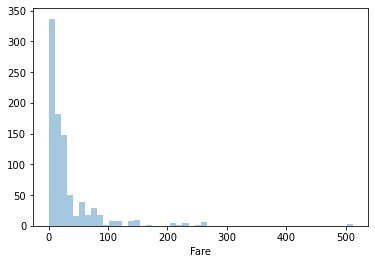

In [14]:
sns.distplot(train_data.Fare, kde=False)

In [15]:
for price in [15, 30, 50, 70, 100]:
    print("Ticket price less than", price, "- %:", np.where(train_data.Fare < price, 1, 0).mean())

Ticket price less than 15 - %: 0.5129068462401796
Ticket price less than 30 - %: 0.7306397306397306
Ticket price less than 50 - %: 0.819304152637486
Ticket price less than 70 - %: 0.8821548821548821
Ticket price less than 100 - %: 0.9405162738496072


In [16]:
for price in [15, 30, 50, 70, 100]:
    print("Price <", price, "survived %", train_data.loc[train_data.Fare < price, "Survived"].mean())
    print("Price >", price, "survived %", train_data.loc[train_data.Fare > price, "Survived"].mean())
    print()

Price < 15 survived % 0.24945295404814005
Price > 15 survived % 0.5265588914549654

Price < 30 survived % 0.3087557603686636
Price > 30 survived % 0.5811965811965812

Price < 50 survived % 0.31917808219178084
Price > 50 survived % 0.68125

Price < 70 survived % 0.3384223918575064
Price > 70 survived % 0.7238095238095238

Price < 100 survived % 0.3615751789976134
Price > 100 survived % 0.7358490566037735



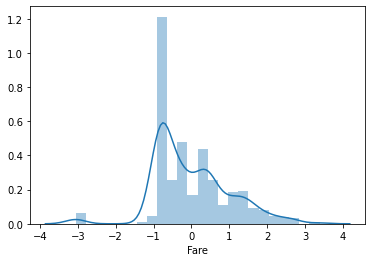

In [33]:
log_fare = np.log1p(train_data.Fare)
log_fare_mean = np.mean(log_fare)
log_fare_std = np.std(log_fare)
sns.distplot((log_fare - log_fare_mean) / log_fare_std)

# Data observations
*Have NaNs:* Age, Fare (some zeros, nans too), Cabin, Embarked
*NOTE:* maybe need to approximate missing values using some other technique, like an additional model?

* (+) Pclass:
  * 1 - 3 number, 1 being the highest
  * Range: 1-3
  * Current approach: convert to one-hot.
  * Previous approaches:
      * normalize by 3.
* (+) Name:
  * has person's title, which could be used (Mr, Ms, Mrs, etc.)
  * From title, can infer marital status?
  * Current approach: extract titles, replace infrequent ones with "Others", convert them to one-hot, and calculate 'Married' based on title (1 - married (Mr, Mrs), -1 - unmarried (Miss, Master), 0 - unknown (other titles))
  * Potential improvements: use more titles for getting 'married'; use 'maiden name' in calculation of 'married'; use 'nickname' somehow?
* (+) Sex:
  * Either male or female
  * male: 65%, female: 35%
  * Current approach: convert to one-hot.
  * Potential improvements: use 1 and -1 for sexes?
* (+) Age:
  * has fractions if approximated. Has missing values.
  * Range: 0.42-80
  * Current approach: fill NaN with average in group-by Pclass-Sex, but create a column that identifies missing values. Also, normalize by 80.
  * Potential improvements: have a better approximation of age. Convert to age categories?
* (+) SibSp:
  * how many siblings or spouses on board.
  * Range: 0-8
  * Current approach: Add to 'Family'.
  * Previous approaches:
    * normalize by 8.
* (+) Parch:
  * How many parents/children. (can be 0 for babies, if with nannies)
  * Range: 0-6
  * Current approach: Add to 'Family'
  * Previous approachesL
    * normalize by 6.
* Ticket:
  * A number with some optional letters (which can have some meaning?).
  * Has repetitions (maybe for people travelling together).
* (+) Fare:
  * can have zeros (what do they mean?). Can have omitted (just one in test).
  * Range: 0-512.3292
  * Current approach: fill nan with mean, normalize by 512.
  * Potential improvements: most fare is <= 30 USD, so maybe use fare categories.
* (+) Cabin:
  * has a lot of omitted values (78%). Can have multiple values (probably for families?).
  * One value is a letter with a number. (both probably have meaning and impact?)
  * Current approach: convert to one-hot (based on letter), include a 'nan' column for those that are missing values. Create a column for cabin number, and a column to identify missing numbers.
  * Potential improvements: maybe cabin number itself doesn't mean much? Also, maybe need to deal with missing values in a different way? Also, maybe deal with multiple values better?
* (+) Embarked:
  * Either of 3 letters (with different frequency). Has just a few omitted.
  * S - 72/65%, C - 19/24%, Q - 9/11%
  * Current approach: convert to one-hot matrix (fill 2 missing with mode)
  * Potential improvements: somehow take into the account different distribution of embarkation city?